In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"/content/Walmart DataSet.csv")

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### Feature Name Description

 Store -  Store number

 Date - Week of Sales

 Weekly_Sales Sales - for the given store in that week

 Holiday_Flag -  If it is a holiday week

 Temperature - Temperature on the day of the sale

 Fuel_Price - Cost of the fuel in the region

 CPI-  Consumer Price Index

 Unemployment- Unemployment Rate

#

1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:

    a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

   b. If the weekly sales show a seasonal trend, when and what could be the reason?

   c. Does temperature affect the weekly sales in any manner?

   d. How is the Consumer Price index affecting the weekly sales of various stores?

   e. Top performing stores according to the historical data.

   f. The worst performing store, and how significant is the difference between the
   highest and lowest performing stores.


In [4]:
df.shape

(6435, 8)

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
# Here we change the data type

In [7]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [8]:
df.duplicated().sum()
#NO duplicate value found

0

In [9]:
df.isnull().sum()
#no null value found

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

In [14]:
sale = df.groupby('Store')[['Weekly_Sales','Unemployment']].corr().iloc[0::2, 1]
sale

Store              
1      Weekly_Sales   -0.097955
2      Weekly_Sales    0.066325
3      Weekly_Sales   -0.230413
4      Weekly_Sales   -0.337015
5      Weekly_Sales   -0.207043
6      Weekly_Sales    0.044251
7      Weekly_Sales   -0.165382
8      Weekly_Sales   -0.052580
9      Weekly_Sales   -0.191534
10     Weekly_Sales    0.131908
11     Weekly_Sales   -0.020339
12     Weekly_Sales   -0.009286
13     Weekly_Sales   -0.171633
14     Weekly_Sales    0.210786
15     Weekly_Sales    0.078905
16     Weekly_Sales   -0.070864
17     Weekly_Sales   -0.263600
18     Weekly_Sales    0.139179
19     Weekly_Sales    0.101464
20     Weekly_Sales   -0.095341
21     Weekly_Sales    0.218367
22     Weekly_Sales    0.039043
23     Weekly_Sales   -0.077169
24     Weekly_Sales   -0.012261
25     Weekly_Sales   -0.004958
26     Weekly_Sales   -0.066899
27     Weekly_Sales   -0.014275
28     Weekly_Sales    0.136671
29     Weekly_Sales    0.084682
30     Weekly_Sales    0.201862
31     Weekly_Sales 

In [12]:
sale_number = sale.groupby(level=0).min().idxmin()

In [13]:
sale_number

38

38 number store have higest effected by uneployement

#

b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [15]:
seasonal = df.groupby('Date')['Weekly_Sales'].sum()

In [16]:
seasonal = pd.DataFrame(seasonal)
seasonal

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
s = seasonal_decompose(seasonal)
result = s.seasonal

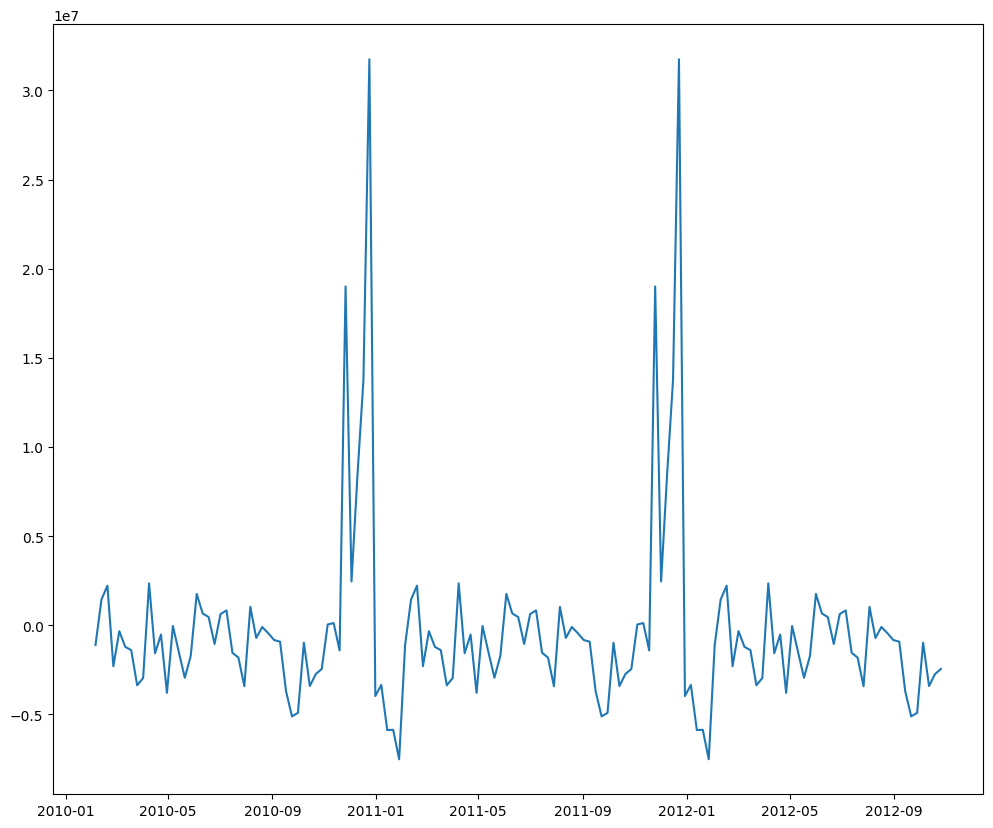

In [19]:
plt.figure(figsize=(12,10))
plt.plot(result)

Does temperature affect the weekly sales in any manner?

In [20]:
temp = df[['Weekly_Sales','Temperature']]

In [21]:
temp.corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.00000,-0.06381
Temperature,-0.06381,1.00000


In [ ]:
# Here we see the Negative affect between weekly sale and temperature

#

How is the Consumer Price index affecting the weekly sales of various stores?

In [22]:
cp = df.groupby('Store')[['Weekly_Sales','CPI']].corr().iloc[0::2,1]

In [23]:
cp

Store              
1      Weekly_Sales    0.225408
2      Weekly_Sales   -0.062431
3      Weekly_Sales    0.317250
4      Weekly_Sales    0.351157
5      Weekly_Sales    0.308261
6      Weekly_Sales   -0.011357
7      Weekly_Sales    0.289044
8      Weekly_Sales    0.120255
9      Weekly_Sales    0.294805
10     Weekly_Sales   -0.115374
11     Weekly_Sales    0.069781
12     Weekly_Sales    0.084087
13     Weekly_Sales    0.163976
14     Weekly_Sales   -0.419755
15     Weekly_Sales   -0.174467
16     Weekly_Sales    0.124285
17     Weekly_Sales    0.348571
18     Weekly_Sales   -0.193541
19     Weekly_Sales   -0.155341
20     Weekly_Sales    0.058706
21     Weekly_Sales   -0.163649
22     Weekly_Sales   -0.038602
23     Weekly_Sales    0.084248
24     Weekly_Sales   -0.013684
25     Weekly_Sales   -0.010914
26     Weekly_Sales    0.131980
27     Weekly_Sales   -0.213082
28     Weekly_Sales   -0.095908
29     Weekly_Sales   -0.072530
30     Weekly_Sales   -0.298188
31     Weekly_Sales 

In [ ]:
#yes CPI affecting Weekly sale store bt store

In [24]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


Top performing stores according to the historical data.

In [25]:
top_store = df.groupby('Store')['Weekly_Sales'].sum()

In [26]:
print(f'this top performing store {top_store.sort_values(ascending=True)}')

this top performing store Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64


#

 The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [27]:
highest = df.groupby('Store')['Weekly_Sales'].sum().max()
lowest = df.groupby('Store')['Weekly_Sales'].sum().min()

In [28]:
difference = highest - lowest

In [30]:
print(f'Here difference between highest and lowest {difference}')

Here difference between highest and lowest 264237570.49999997


#

#### 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [31]:
f = df.groupby(['Store','Date'])['Weekly_Sales'].sum()

In [32]:
f = pd.DataFrame(f)
f = f.reset_index()

In [33]:
store_1 = f[f['Store']==1]

In [34]:
store_1

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
138,1,2012-09-28,1437059.26
139,1,2012-10-05,1670785.97
140,1,2012-10-12,1573072.81
141,1,2012-10-19,1508068.77


In [35]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
store_1.index = store_1['Date']

In [37]:
store_1.drop(columns= ['Store','Date'],inplace=True)

<ipython-input-37-c5778a0dfec0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_1.drop(columns= ['Store','Date'],inplace=True)


In [38]:
store_1

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [39]:
seasonal = seasonal_decompose(store_1,period=12)

<Axes: xlabel='Date'>

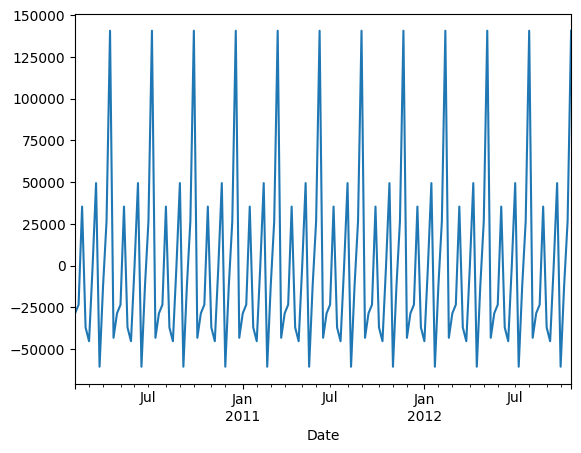

In [40]:
s = seasonal.seasonal
s.plot()

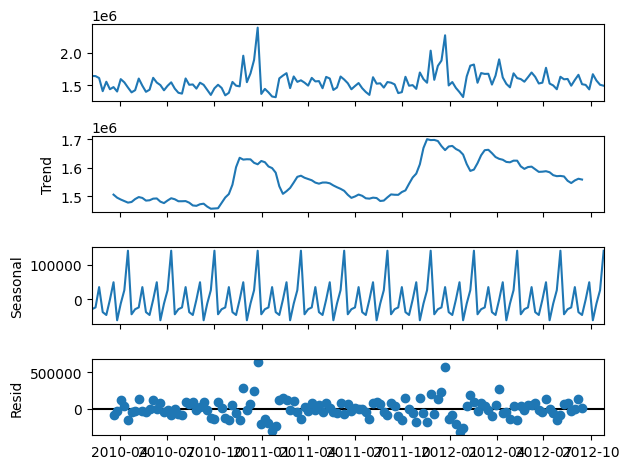

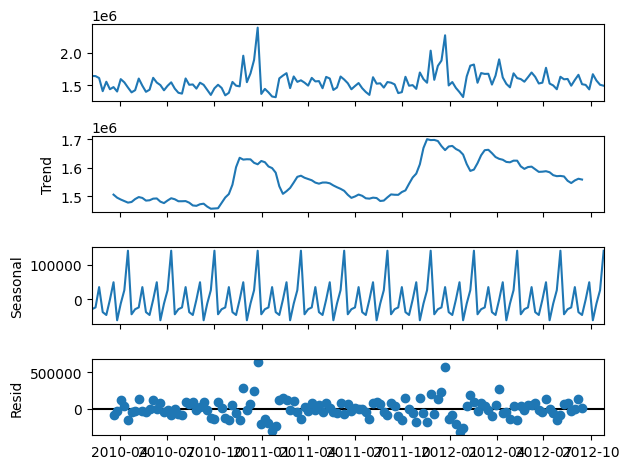

In [41]:
seasonal.plot()

In [ ]:
# Here we see seasonality in the data

Now we check data Stationarity with help of Adfuller function

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
score = adfuller(store_1)
if score[1]<0.05:
    print('Data is stationary')
else:
    print('Data is not stationary')

Data is stationary


In [45]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [46]:
from pmdarima.arima import auto_arima

In [47]:
model = auto_arima(store_1,seasonal=True,m=12)

In [48]:
model

ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

we have p = 2 , d = 1, q = 3 value with auto_arima function

*   List item

*   List item

*   List item
*   List item


*   List item


*   List item



So,Data is seasonal that's why we use Sarima model for forcasting

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
store_1

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [51]:
train_size = round(int(len(store_1)*0.8))
train = store_1[:train_size]
test = store_1[train_size:]


In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
model = SARIMAX(store_1,order=(2,1,3),seasonal_order=(2,1,3,4))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [54]:
model_fit =model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
start_pred = len(train)
end_pred = len(train) + len(test) - 1
predictions = model_fit.predict(start=start_pred, end=end_pred, dynamic=False)

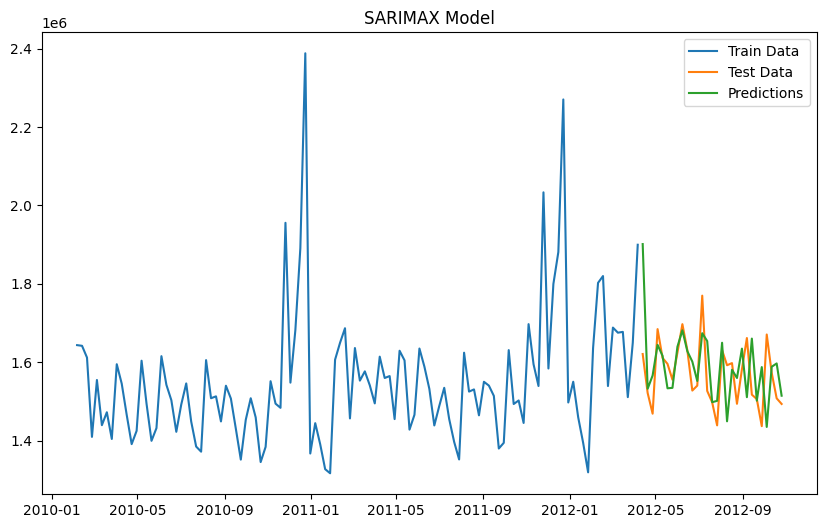

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='Predictions')
plt.title('SARIMAX Model')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
mean_absolute_error(predictions,test)

69938.35148511754

In [60]:
forcast = model_fit.forecast(12)

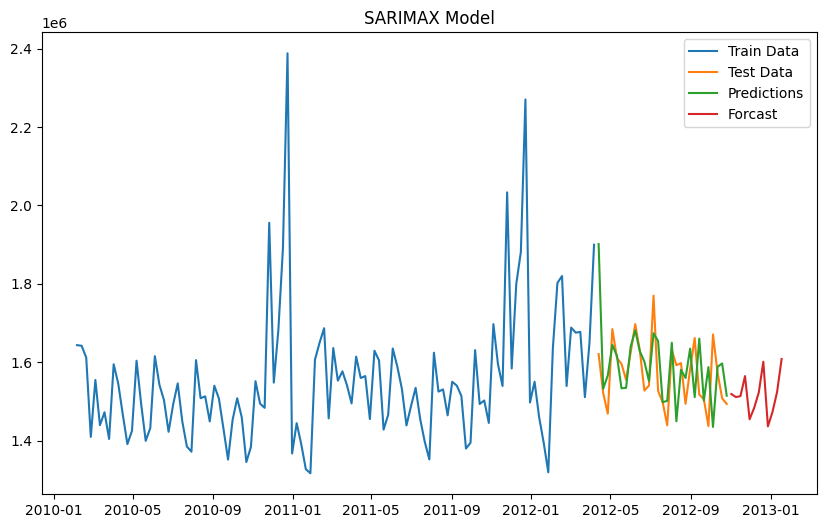

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predictions, label='Predictions')
plt.plot(forcast,label = 'Forcast')
plt.title('SARIMAX Model')
plt.legend()
plt.show()

##### Store 1 prediction of weekly sales for the next 12 weeks.